<a href="https://colab.research.google.com/github/Suman-Adhikary/Diabetes-Prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries.

---



---



In [103]:
!pip install feature_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest
import statsmodels.api as sm
import scipy.stats as stats
from feature_engine.outliers import OutlierTrimmer
from imblearn.over_sampling import RandomOverSampler

# Dataset.

---



---



In [104]:
dataset = pd.read_csv('diabetes.csv')
dataset.shape

(100000, 9)

In [105]:
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## Variable.

---



---



In [106]:
with open('variable.txt') as f:
  print(f.read())

Age: Age is an important factor in predicting diabetes risk. As individuals get older, their risk of developing diabetes increases. This is partly due to factors such as reduced physical activity, changes in hormone levels, and a higher likelihood of developing other health conditions that can contribute to diabetes.

Gender: Gender can play a role in diabetes risk, although the effect may vary. For example, women with a history of gestational diabetes (diabetes during pregnancy) have a higher risk of developing type 2 diabetes later in life. Additionally, some studies have suggested that men may have a slightly higher risk of diabetes compared to women.

Body Mass Index (BMI): BMI is a measure of body fat based on a person's height and weight. It is commonly used as an indicator of overall weight status and can be helpful in predicting diabetes risk. Higher BMI is associated with a greater likelihood of developing type 2 diabetes. Excess body fat, particularly around the waist, can le

# Exploratory data analysis(EDA).

---



---



In [107]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [108]:
dataset.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [109]:
dataset.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

## Remove Duplicate.

---



In [110]:
duplicate_rows_data = dataset[dataset.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (3854, 9)


In [111]:
dataset = dataset.drop_duplicates()

In [112]:
dataset.shape

(96146, 9)

## Univariate analysis.

---



### Gender.

---



In [113]:
dataset['gender'].value_counts()

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

### Smoking history.

---



In [114]:
dataset['smoking_history'].value_counts()

never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: smoking_history, dtype: int64

### Hypertension.

---



In [115]:
dataset['hypertension'].value_counts()

0    88685
1     7461
Name: hypertension, dtype: int64

### Heart disease.

---



In [116]:
dataset['heart_disease'].value_counts()

0    92223
1     3923
Name: heart_disease, dtype: int64

### Diabetes.

---



In [117]:
dataset['diabetes'].value_counts()

0    87664
1     8482
Name: diabetes, dtype: int64

### Count plot for Univariate.

---



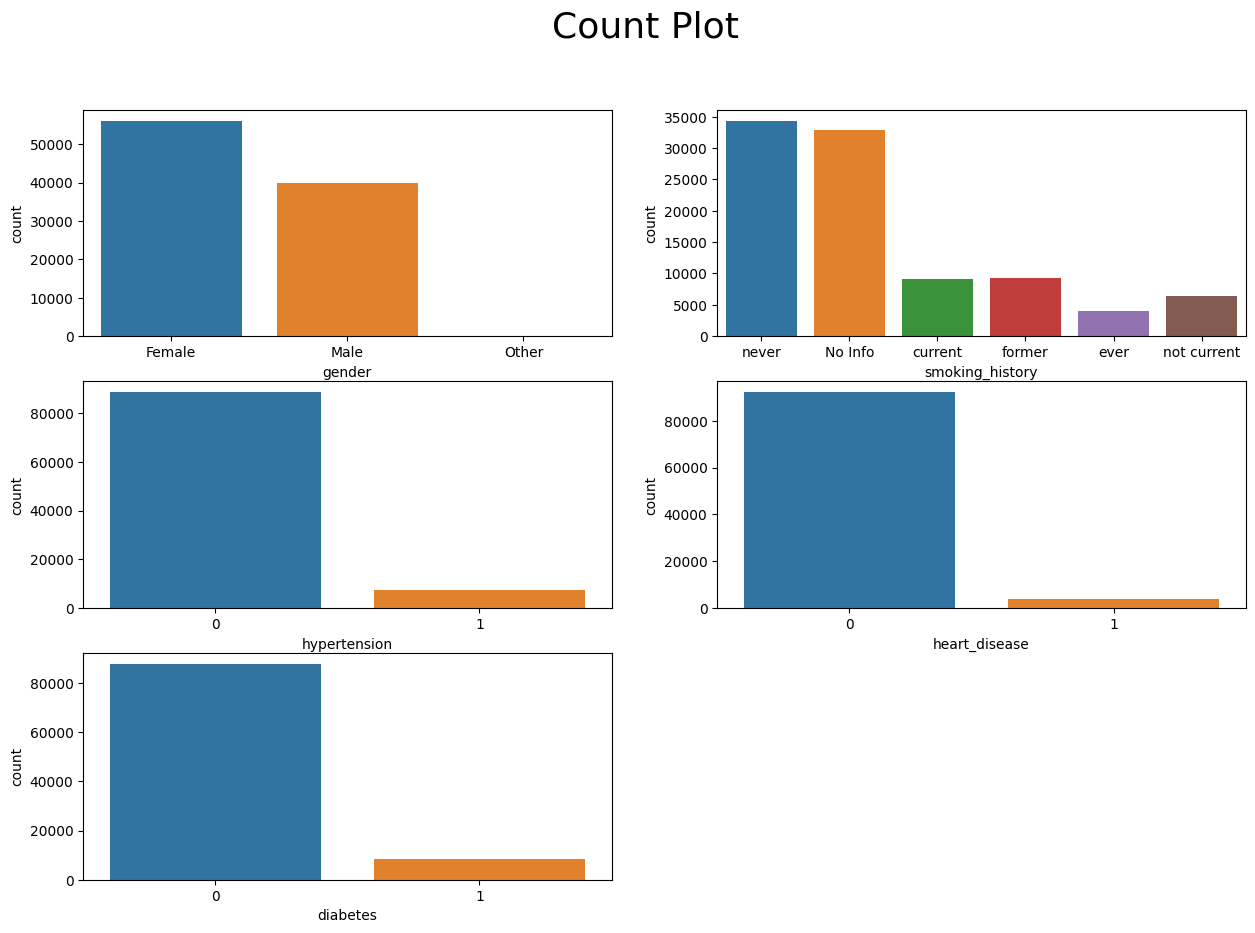

In [118]:
col = ['gender', 'smoking_history', 'hypertension', 'heart_disease', 'diabetes']

fig, axs = plt.subplots(3, 2, figsize=(15, 10), squeeze=False)

Axis = []
for j in range(3):
    for k in range(2):
        Axis.append(axs[j, k])

for i in range(len(col)):
    sns.countplot(data = dataset, x = col[i], ax=Axis[i])

for ax in axs.flat:
        if not bool(ax.has_data()):
            fig.delaxes(ax)
fig.suptitle("Count Plot", fontsize=26)
plt.show()

### Histogram.

---



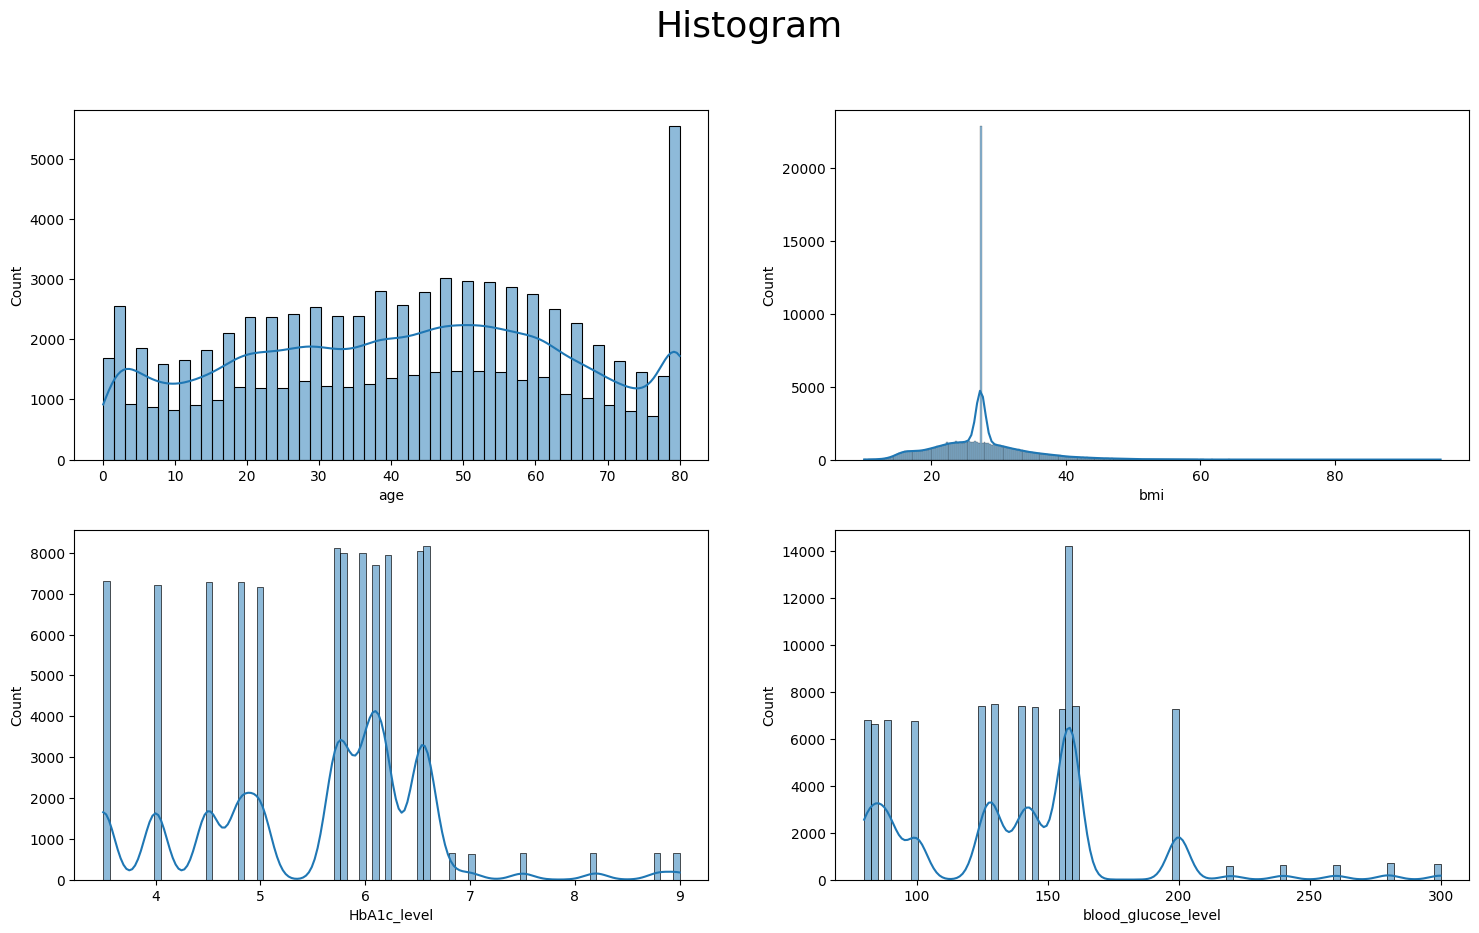

In [119]:
col = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

fig, axs = plt.subplots(2, 2, figsize=(18, 10), squeeze=False)

Axis = []
for j in range(2):
    for k in range(2):
        Axis.append(axs[j, k])

for i in range(len(col)):
    sns.histplot(data = dataset, x = col[i], kde = True, ax=Axis[i])

for ax in axs.flat:
        if not bool(ax.has_data()):
            fig.delaxes(ax)
fig.suptitle("Histogram", fontsize=26)
plt.show()

### Box plot.

---



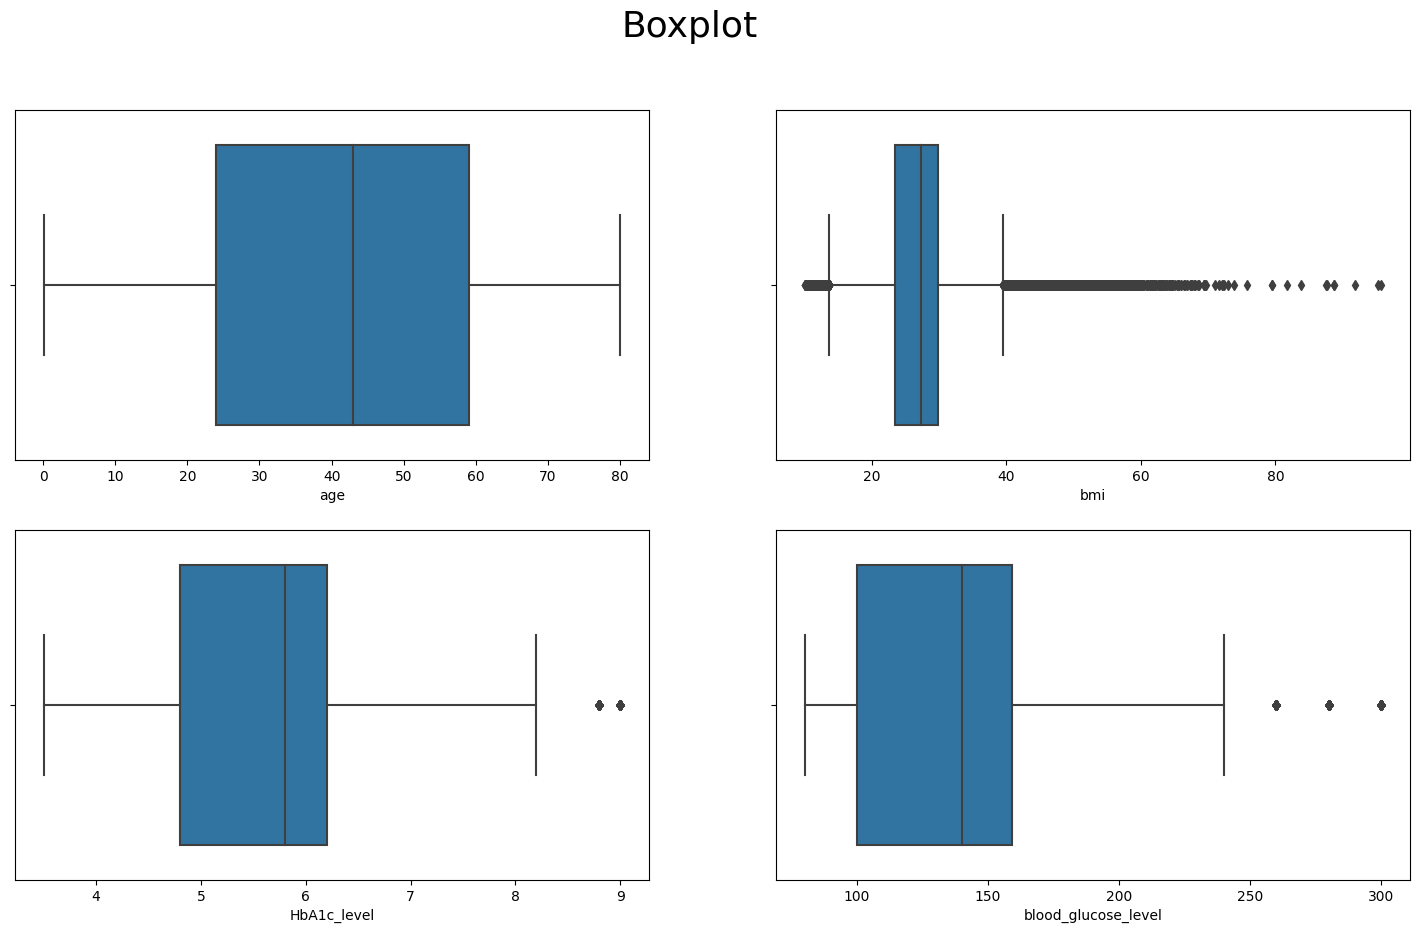

In [120]:
col = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

fig, axs = plt.subplots(2, 2, figsize=(18, 10), squeeze=False)

Axis = []
for j in range(2):
    for k in range(2):
        Axis.append(axs[j, k])

for i in range(len(col)):
    sns.boxplot(data = dataset, x = col[i], ax=Axis[i])

for ax in axs.flat:
        if not bool(ax.has_data()):
            fig.delaxes(ax)
fig.suptitle("Boxplot", fontsize=26)
plt.show()

## Bivariate analysis.

---



### Diabetes upon Gender group.

---



In [121]:
dataset.groupby('gender')['diabetes'].value_counts()

gender  diabetes
Female  0           51714
        1            4447
Male    0           35932
        1            4035
Other   0              18
Name: diabetes, dtype: int64

### Diabetes upon Smoking.

---



In [122]:
dataset.groupby('smoking_history')['diabetes'].value_counts()

smoking_history  diabetes
No Info          0           31442
                 1            1445
current          0            8249
                 1             948
ever             0            3526
                 1             472
former           0            7709
                 1            1590
never            0           31061
                 1            3337
not current      0            5677
                 1             690
Name: diabetes, dtype: int64

### Diabetes upon Hypertension.

---



In [123]:
dataset.groupby('hypertension')['diabetes'].value_counts()

hypertension  diabetes
0             0           82289
              1            6396
1             0            5375
              1            2086
Name: diabetes, dtype: int64

### Diabetes upon Heart Disease.

---



In [124]:
dataset.groupby('heart_disease')['diabetes'].value_counts()

heart_disease  diabetes
0              0           85008
               1            7215
1              0            2656
               1            1267
Name: diabetes, dtype: int64

### Count plot for Bivariate.

---



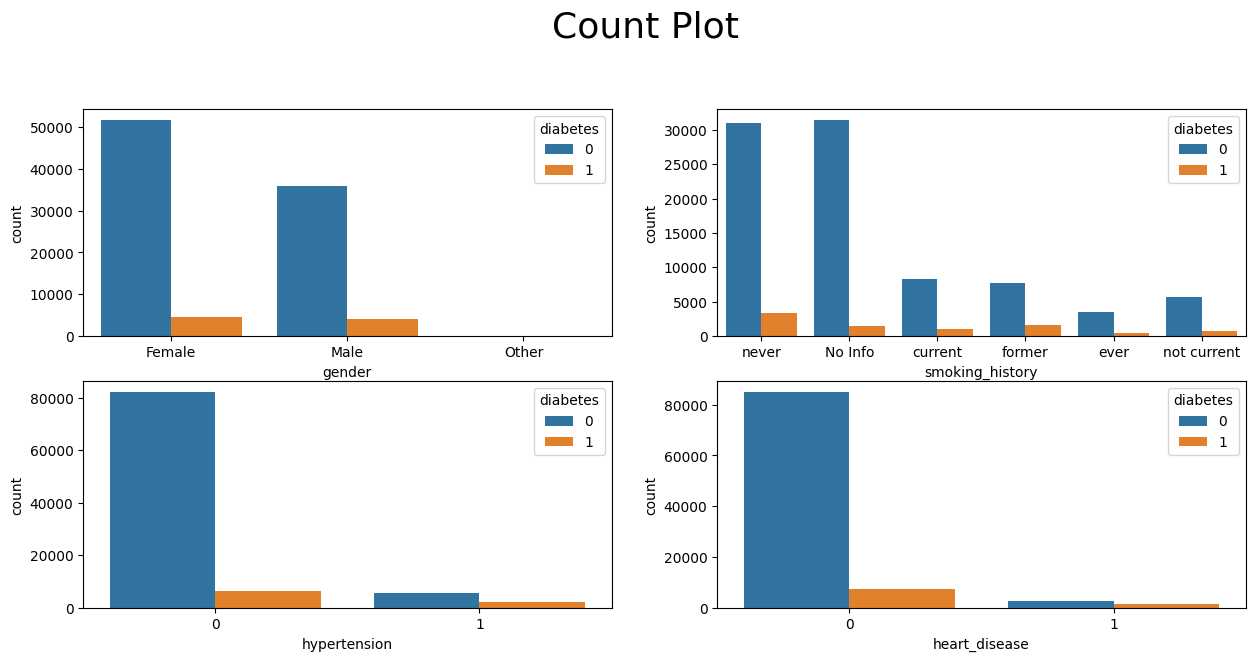

In [125]:
col = ['gender', 'smoking_history', 'hypertension', 'heart_disease']

fig, axs = plt.subplots(3, 2, figsize=(15, 10), squeeze=False)

Axis = []
for j in range(3):
    for k in range(2):
        Axis.append(axs[j, k])

for i in range(len(col)):
    sns.countplot(data = dataset, x = col[i], hue = 'diabetes', ax=Axis[i])

for ax in axs.flat:
        if not bool(ax.has_data()):
            fig.delaxes(ax)
fig.suptitle("Count Plot", fontsize=26)
plt.show()

### Boxplot between BMI and Diabetes with respect to Gender.

---



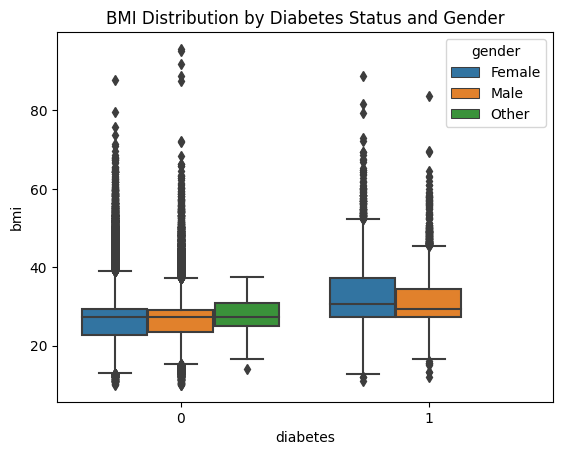

In [126]:
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=dataset)
plt.title('BMI Distribution by Diabetes Status and Gender')
plt.show()

### Boxplot between Age and Diabetes with respect to Gender.

---



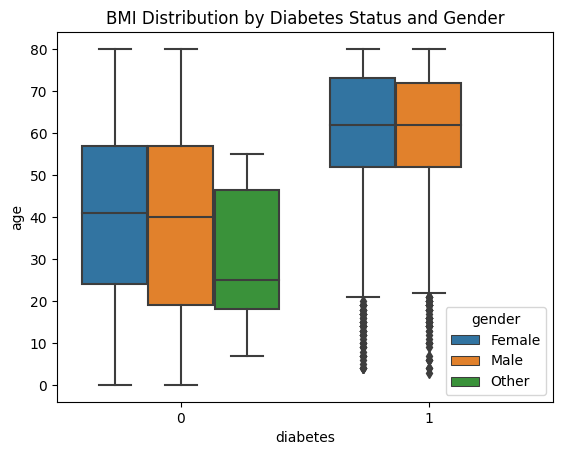

In [127]:
sns.boxplot(x='diabetes', y='age', hue='gender', data=dataset)
plt.title('BMI Distribution by Diabetes Status and Gender')
plt.show()

### Violinplot between Diabetes and HbA1c level with respect to Heart Disease.

---



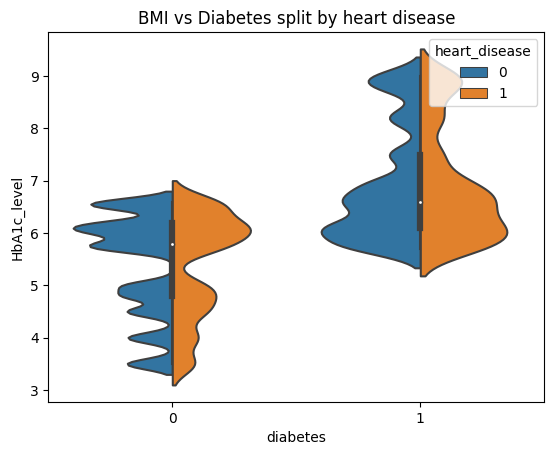

In [128]:
sns.violinplot(x='diabetes', y='HbA1c_level', hue='heart_disease', split=True, data=dataset)
plt.title('BMI vs Diabetes split by heart disease')
plt.show()

### ### Violinplot between Diabetes and Blood Glucose Level with respect to Heart Disease.

---



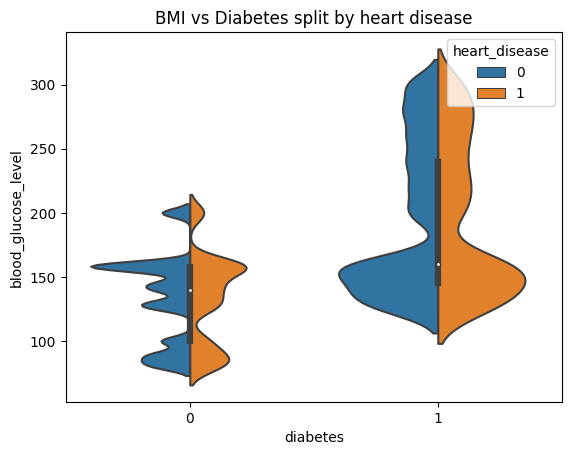

In [129]:
sns.violinplot(x='diabetes', y='blood_glucose_level', hue='heart_disease', split=True, data=dataset)
plt.title('BMI vs Diabetes split by heart disease')
plt.show()

### Scatterplot between Age and BMI with respect to gender.

---



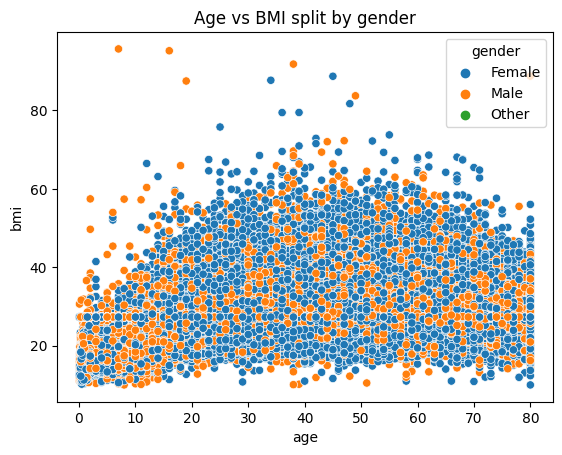

In [130]:
sns.scatterplot(data=dataset, x="age", y="bmi", hue="gender")
plt.title('Age vs BMI split by gender')
plt.show()

### Jointplot between Age and BMI with respect to regression.

---



In [131]:
# sns.jointplot(data = dataset, x = 'age', y = 'bmi', kind = 'reg')
# plt.show()

## Multivariate analysis.

In [132]:
# sns.pairplot(dataset, hue = 'diabetes')
# plt.show()

# Feature Engineering.

---



---



In [133]:
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [134]:
dataset['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [135]:
dataset['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

## Remove unwanted value from gender.

---



In [136]:
dataset = dataset[dataset['gender'] != 'Other']

In [137]:
dataset['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [138]:
dataset.shape

(96128, 9)

## Smoking history.

---



In [139]:
CrossTable=pd.crosstab(dataset['diabetes'],dataset['smoking_history'])
CrossTable

smoking_history,No Info,current,ever,former,never,not current
diabetes,,,,,,
0,31436,8249,3525,7709,31058,5669
1,1445,948,472,1590,3337,690


In [140]:
dataset["smoking_history"] = dataset["smoking_history"].map({"never" : 'non-smoker', "No Info" : 'non-smoker',
                                                             "current" : 'current', "former" : 'past_smoker',
                                                             'ever' : 'past_smoker', 'not current' : 'past_smoker'})

<ipython-input-140-90eeb2c1ef87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["smoking_history"] = dataset["smoking_history"].map({"never" : 'non-smoker', "No Info" : 'non-smoker',


In [141]:
dataset['smoking_history'].value_counts()

non-smoker     67276
past_smoker    19655
current         9197
Name: smoking_history, dtype: int64

## Age.

---



In [142]:
dataset['age'] = dataset['age'].astype(int)

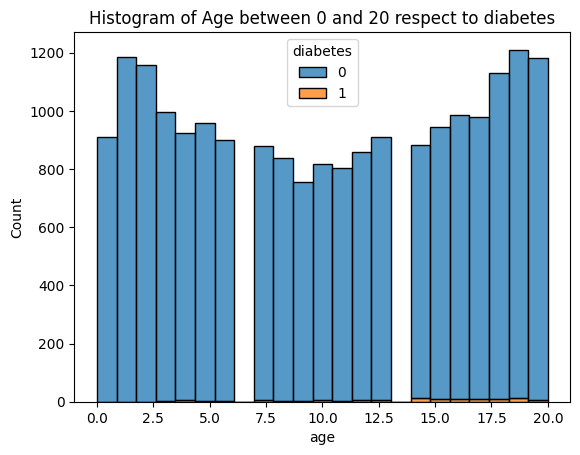

In [143]:
Age_0_20 = dataset[(dataset['age'] >= 0) & (dataset['age'] <= 20)]
sns.histplot(data = Age_0_20, x = 'age', hue = 'diabetes', multiple="stack")
plt.title('Histogram of Age between 0 and 20 respect to diabetes')
plt.show()

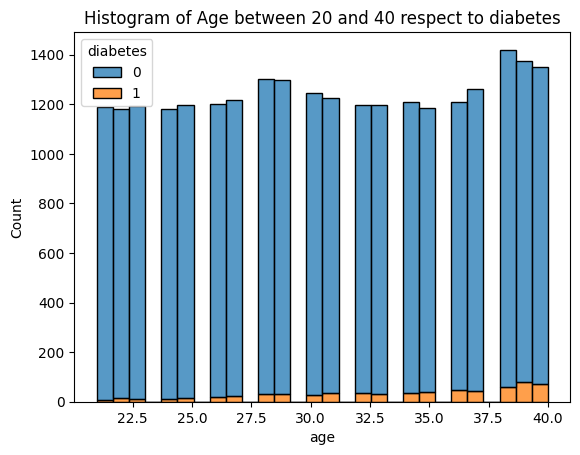

In [144]:
Age_20_40 = dataset[(dataset['age'] > 20) & (dataset['age'] <= 40)]
sns.histplot(data = Age_20_40, x = 'age', hue = 'diabetes', multiple="stack")
plt.title('Histogram of Age between 20 and 40 respect to diabetes')
plt.show()

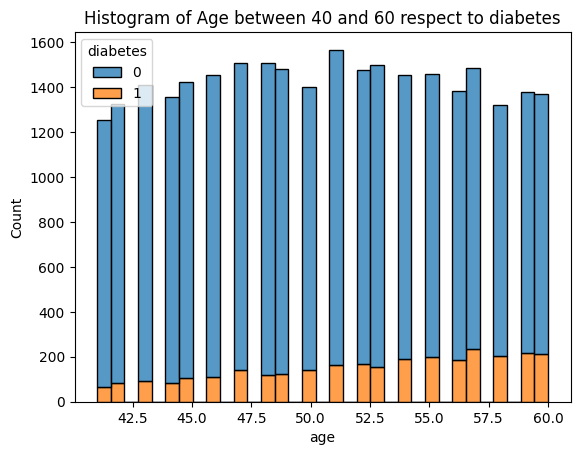

In [145]:
Age_40_60 = dataset[(dataset['age'] > 40) & (dataset['age'] <= 60)]
sns.histplot(data = Age_40_60, x = 'age', hue = 'diabetes', multiple="stack")
plt.title('Histogram of Age between 40 and 60 respect to diabetes')
plt.show()

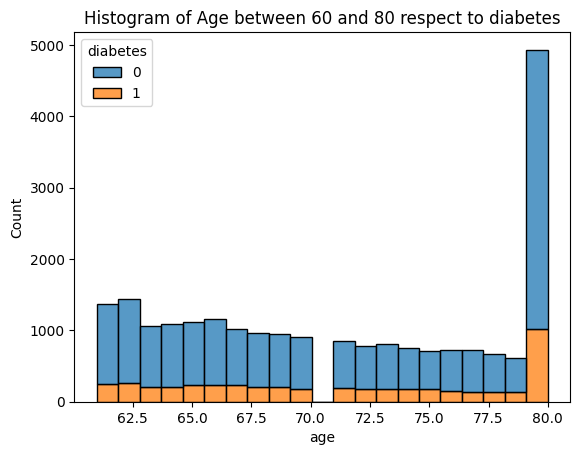

In [146]:
Age_60_80 = dataset[(dataset['age'] > 60) & (dataset['age'] <= 80)]
sns.histplot(data = Age_60_80, x = 'age', hue = 'diabetes', multiple="stack")
plt.title('Histogram of Age between 60 and 80 respect to diabetes')
plt.show()

# Checking outliers.

---



---



## Normality check for age.

---



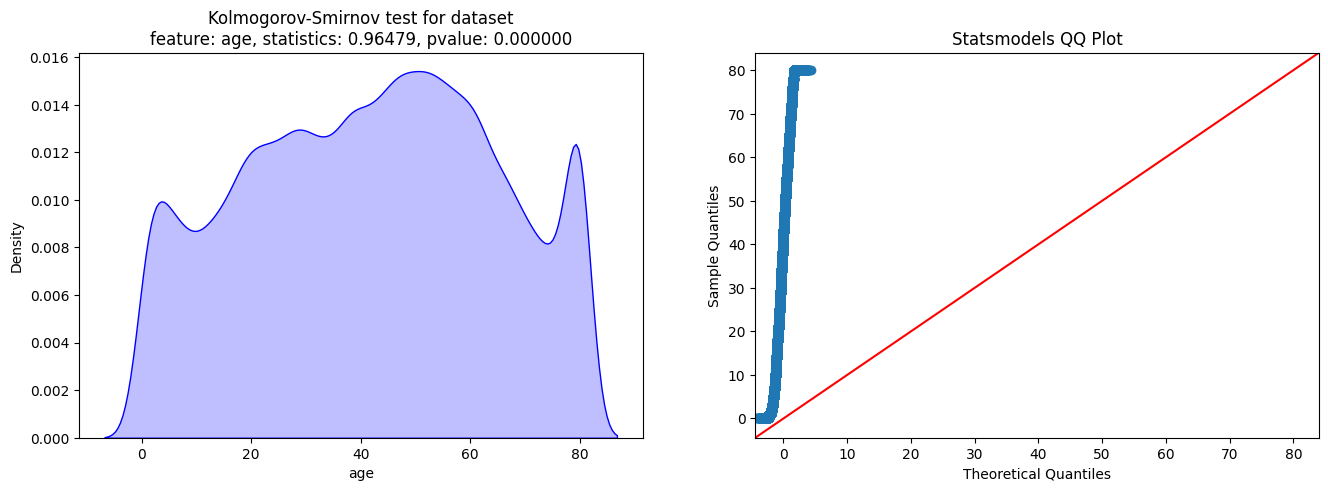

In [147]:
statistic, pvalue = kstest(dataset['age'], 'norm')

fig, axes = plt.subplots(1, 2, figsize=(16,5))
axes[0].set_title("Kolmogorov-Smirnov test for dataset\n"
                  "feature: {}, statistics: {:.5f}, pvalue: {:5f}".format('age', statistic, pvalue))
sns.kdeplot(dataset['age'], color='blue', fill=True, ax=axes[0])

sm.qqplot(dataset['age'], line='45', ax=axes[1])
axes[1].set_title("Statsmodels QQ Plot")

plt.show()

## Normality check for bmi.

---



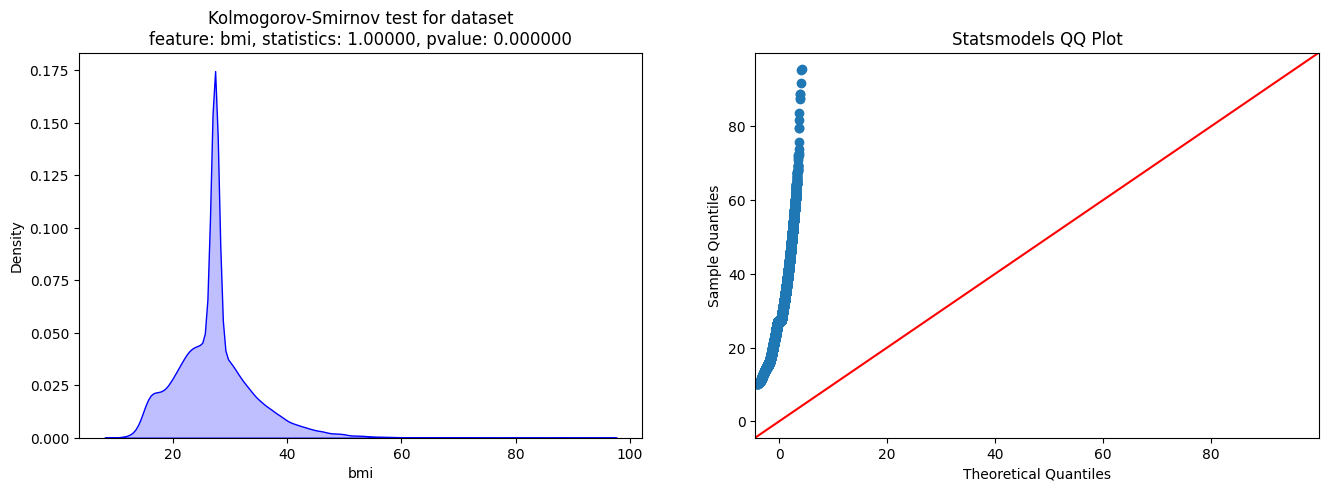

In [148]:
statistic, pvalue = kstest(dataset['bmi'], 'norm')

fig, axes = plt.subplots(1, 2, figsize=(16,5))
axes[0].set_title("Kolmogorov-Smirnov test for dataset\n"
                  "feature: {}, statistics: {:.5f}, pvalue: {:5f}".format('bmi', statistic, pvalue))
sns.kdeplot(dataset['bmi'], color='blue', fill=True, ax=axes[0])

sm.qqplot(dataset['bmi'], line='45', ax=axes[1])
axes[1].set_title("Statsmodels QQ Plot")

plt.show()

## Normality check for HbA1c_level.

---



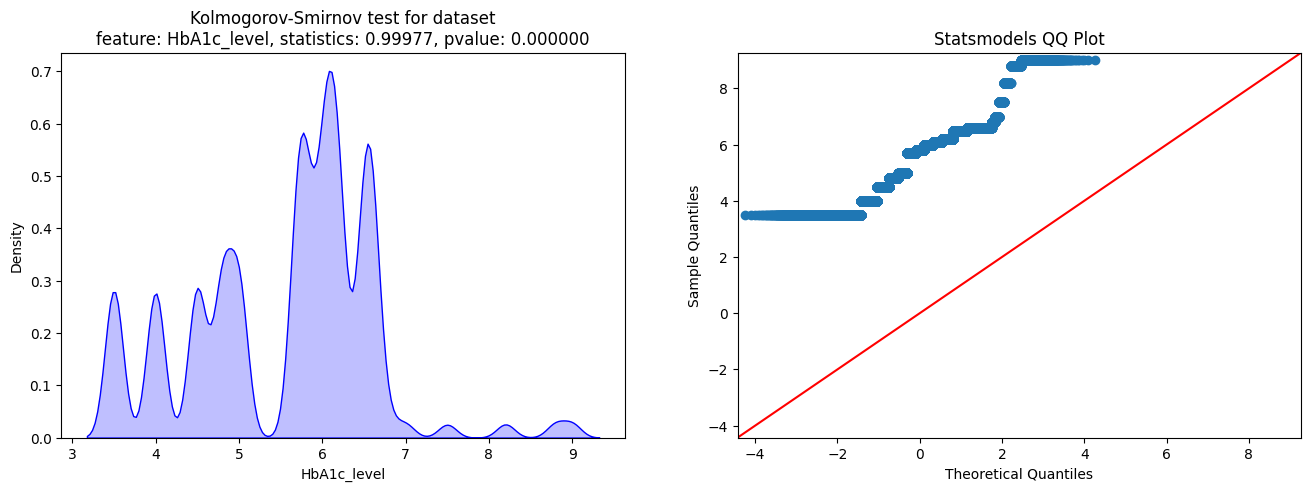

In [149]:
statistic, pvalue = kstest(dataset['HbA1c_level'], 'norm')

fig, axes = plt.subplots(1, 2, figsize=(16,5))
axes[0].set_title("Kolmogorov-Smirnov test for dataset\n"
                  "feature: {}, statistics: {:.5f}, pvalue: {:5f}".format('HbA1c_level', statistic, pvalue))
sns.kdeplot(dataset['HbA1c_level'], color='blue', fill=True, ax=axes[0])

sm.qqplot(dataset['HbA1c_level'], line='45', ax=axes[1])
axes[1].set_title("Statsmodels QQ Plot")

plt.show()

## Normality check for blood_glucose_level.

---



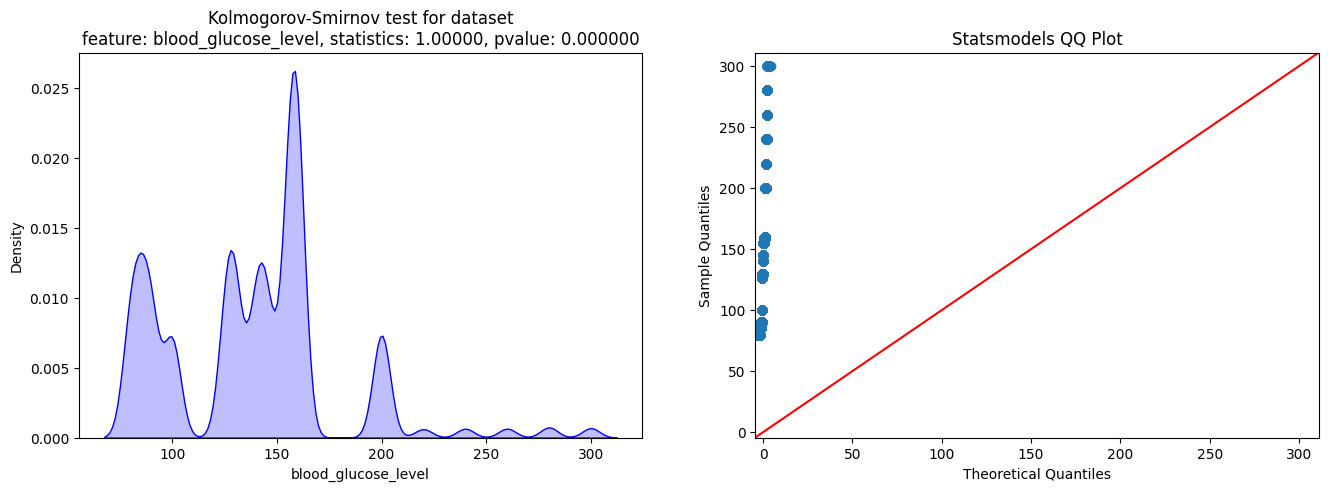

In [150]:
statistic, pvalue = kstest(dataset['blood_glucose_level'], 'norm')

fig, axes = plt.subplots(1, 2, figsize=(16,5))
axes[0].set_title("Kolmogorov-Smirnov test for dataset\n"
                  "feature: {}, statistics: {:.5f}, pvalue: {:5f}".format('blood_glucose_level', statistic, pvalue))
sns.kdeplot(dataset['blood_glucose_level'], color='blue', fill=True, ax=axes[0])

sm.qqplot(dataset['blood_glucose_level'], line='45', ax=axes[1])
axes[1].set_title("Statsmodels QQ Plot")

plt.show()

## Removing outliers.

---



In [151]:
trimmer = OutlierTrimmer(
  variables = ["age", "bmi", "HbA1c_level", "blood_glucose_level"],
  capping_method="iqr",
  tail="both",
  fold=1.5,
)

In [152]:
trimmer.fit(dataset)

OutlierTrimmer(capping_method='iqr', fold=1.5, tail='both',
               variables=['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'])

In [153]:
dataset = trimmer.transform(dataset)

### Checking outlier remove or not.

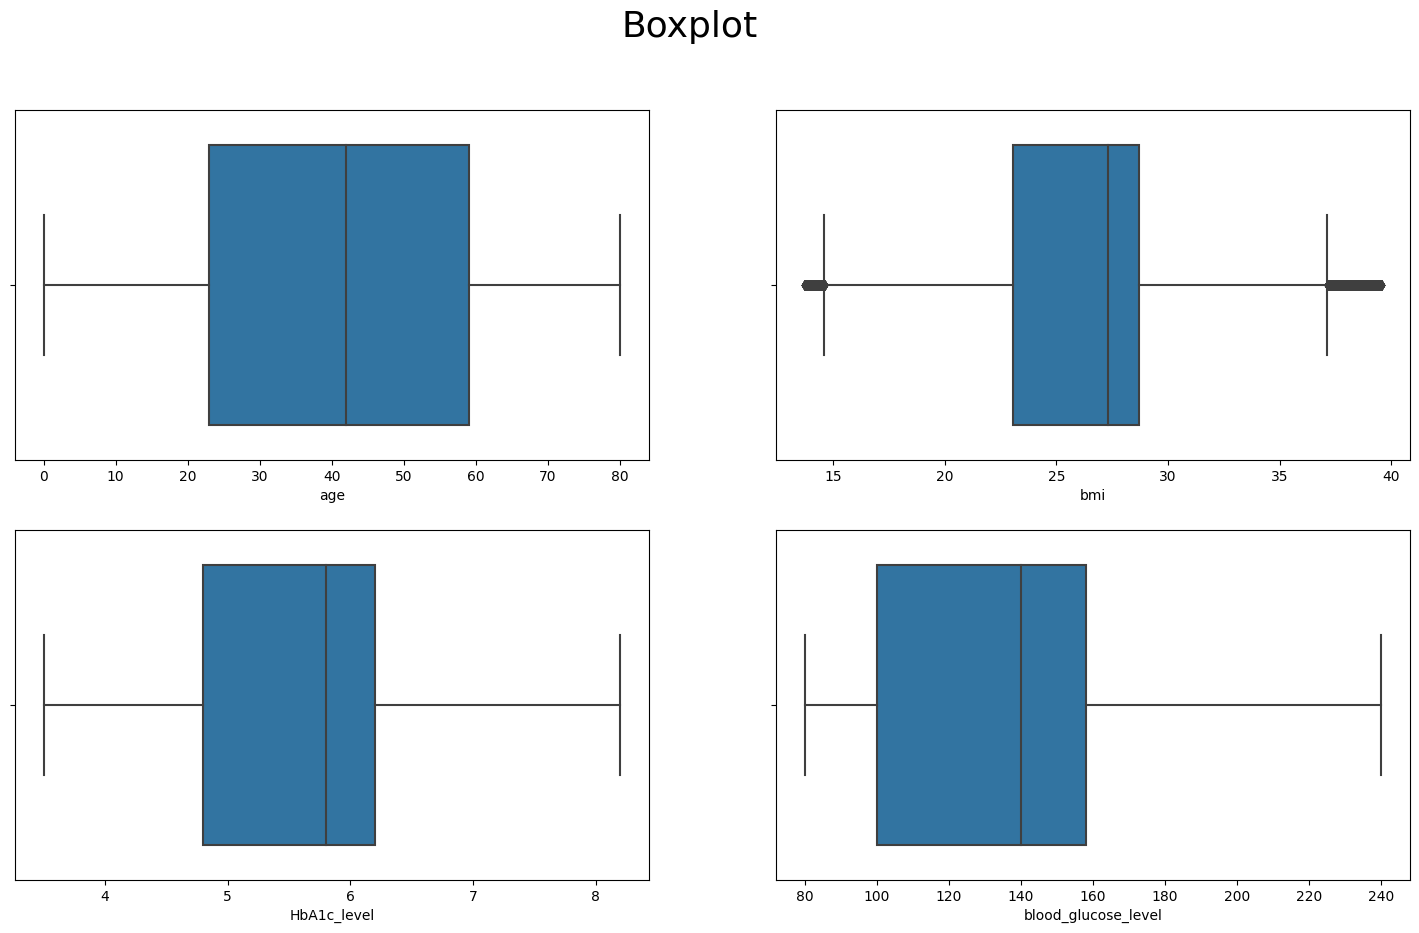

In [154]:
col = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

fig, axs = plt.subplots(2, 2, figsize=(18, 10), squeeze=False)

Axis = []
for j in range(2):
    for k in range(2):
        Axis.append(axs[j, k])

for i in range(len(col)):
    sns.boxplot(data = dataset, x = col[i], ax=Axis[i])

for ax in axs.flat:
        if not bool(ax.has_data()):
            fig.delaxes(ax)
fig.suptitle("Boxplot", fontsize=26)
plt.show()

In [155]:
dataset.shape

(88177, 9)

In [156]:
dataset.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,88177.000000,88177.000000,88177.000000,88177.000000,88177.000000,88177.000000,88177.000000
mean,41.061683,0.068465,0.036880,26.314402,5.459199,134.629144,0.052372
std,22.610541,0.252543,0.188469,5.218110,0.995306,35.256357,0.222777
min,0.000000,0.000000,0.000000,13.710000,3.500000,80.000000,0.000000
25%,23.000000,0.000000,0.000000,23.050000,4.800000,100.000000,0.000000
50%,42.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,28.690000,6.200000,158.000000,0.000000
max,80.000000,1.000000,1.000000,39.550000,8.200000,240.000000,1.000000


# Fix imblaced data.

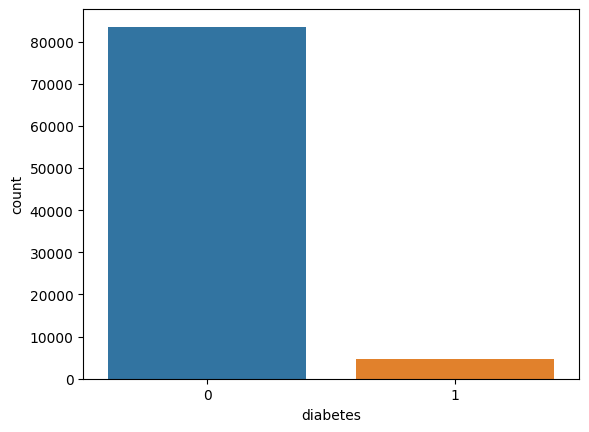

In [157]:
sns.countplot(data = dataset, x = 'diabetes')
plt.show()

In [158]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [159]:
y = dataset['diabetes']
X = dataset.drop(['diabetes'], axis = 1)

In [160]:
X_over, y_over = oversample.fit_resample(X, y)

In [161]:
dataset = pd.concat([X_over, y_over], axis = 1)
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,non-smoker,25.19,6.6,140,0
1,Female,54,0,0,non-smoker,27.32,6.6,80,0
2,Male,28,0,0,non-smoker,27.32,5.7,158,0
3,Female,36,0,0,current,23.45,5.0,155,0
4,Male,76,1,1,current,20.14,4.8,155,0


In [162]:
dataset.shape

(167118, 9)

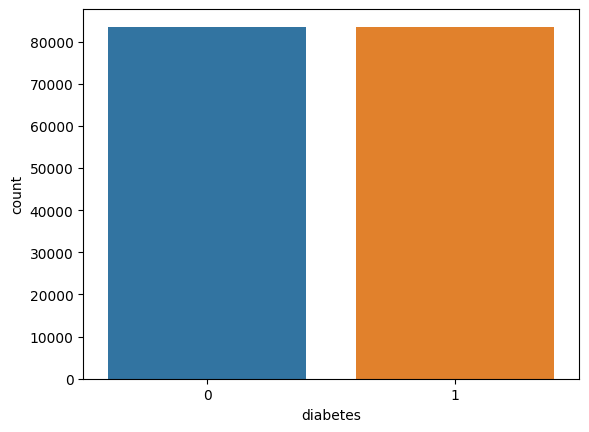

In [163]:
sns.countplot(data = dataset, x = 'diabetes')
plt.show()

# Model Development.